# Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, SGDRegressor

import seaborn as sns
from matplotlib import pyplot as plt

# Dataset

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [5]:
df.info

<bound method DataFrame.info of         RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[489 rows x 4 columns]>

# Pre-processing

In [6]:
features = [i for i in df.columns if i != 'MEDV']

In [7]:
X = df[features]

In [8]:
y = df['MEDV']

# Scalling

### 1. Standardization

In [8]:
X_std = df

In [9]:
scaler_std = StandardScaler().fit(X_std)
X_std = scaler_std.transform(X_std)

In [10]:
X_std

array([[ 0.52055395, -1.1250769 , -1.5250831 ,  0.30064004],
       [ 0.28104837, -0.53706982, -0.33974768, -0.00449803],
       [ 1.46924486, -1.25935736, -0.33974768,  1.66104726],
       ...,
       [ 1.14420158, -1.03178731,  1.17748167,  0.28792595],
       [ 0.86114953, -0.91305511,  1.17748167,  0.04635831],
       [-0.32704695, -0.71516812,  1.17748167, -1.23776439]])

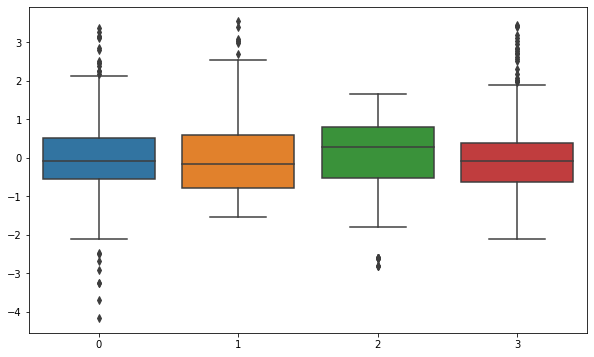

In [11]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=X_std)

In [12]:
df_std = pd.DataFrame(X_std)
#df_std['medv'] = y
df_std.head()

,0,1,2,3
0,0.520554,-1.125077,-1.525083,0.300640
1,0.281048,-0.537070,-0.339748,-0.004498
2,1.469245,-1.259357,-0.339748,1.661047
3,1.178417,-1.413427,0.086973,1.495764
4,1.410146,-1.075605,0.086973,1.851759


In [13]:
x_std = df_std.drop(3, axis=1)
y_std = df_std[3]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_std , y_std, test_size = 0.3)

#### Linear Regression

In [15]:
model_std = LinearRegression()
model_std.fit(X_train, y_train)

LinearRegression()

In [16]:
pred_std = model_std.predict(X_test)

In [17]:
MSE_std = mean_squared_error(y_test, pred_std)
MSE_std

0.2296373672610747

#### Stochastic Gradient Descent

In [18]:
model_std_sgdr = LinearRegression()
model_std_sgdr.fit(X_train, y_train)

LinearRegression()

In [19]:
pred_std_sgdr = model_std_sgdr.predict(X_test)

In [20]:
MSE_std_sgdr = mean_squared_error(y_test, pred_std_sgdr)
MSE_std_sgdr

0.2296373672610747

### Min-Max

In [21]:
X_mm = df

In [22]:
scaler_mm = MinMaxScaler().fit(X_mm)
X_mm = scaler_mm.transform(X_mm)

In [23]:
X_mm

array([[0.6231135 , 0.08335649, 0.28723404, 0.43378995],
       [0.59127558, 0.19894415, 0.55319149, 0.37899543],
       [0.74922473, 0.05696027, 0.55319149, 0.67808219],
       ...,
       [0.70601613, 0.10169492, 0.89361702, 0.43150685],
       [0.6683895 , 0.12503473, 0.89361702, 0.38812785],
       [0.51044036, 0.16393443, 0.89361702, 0.15753425]])

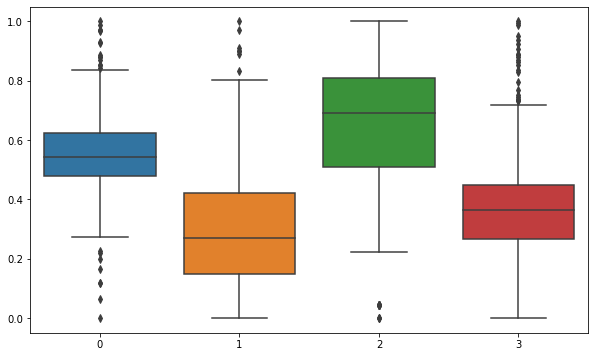

In [24]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=X_mm)

In [25]:
df_mm = pd.DataFrame(X_mm)
#df_mm['medv'] = y
df_mm.head()

,0,1,2,3
0,0.623114,0.083356,0.287234,0.433790
1,0.591276,0.198944,0.553191,0.378995
2,0.749225,0.056960,0.553191,0.678082
3,0.710564,0.026674,0.648936,0.648402
4,0.741369,0.093081,0.648936,0.712329


In [26]:
x_mm = df_mm.drop(3, axis=1)
y_mm = df_mm[3]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_mm , y_mm, test_size = 0.3)

#### Linear Regression

In [28]:
model_mm = LinearRegression()
model_mm.fit(X_train, y_train)

LinearRegression()

In [29]:
pred_mm = model_mm.predict(X_test)

In [30]:
MSE_mm = mean_squared_error(y_test, pred_mm)
MSE_mm

0.009298390352536379

In [101]:
#teste = scaler_mm.inverse_transform(X_mm)

#### Stochastic Gradient Descent

In [31]:
model_mm_sgdr = SGDRegressor()
model_mm_sgdr.fit(X_train, y_train)

SGDRegressor()

In [32]:
pred_mm_sgdr = model_mm_sgdr.predict(X_test)

In [33]:
MSE_mm_sgdr = mean_squared_error(y_test, pred_mm_sgdr)
MSE_mm_sgdr

0.019491106956926654

### Normalizer

In [34]:
X_norm = df

In [35]:
scaler_norm = Normalizer().fit(X_norm)
X_norm = scaler_norm.transform(X_norm)

In [36]:
X_norm

array([[1.30456349e-05, 9.88095238e-06, 3.03571428e-05, 9.99999999e-01],
       [1.41556437e-05, 2.01499118e-05, 3.92416225e-05, 9.99999999e-01],
       [9.86002470e-06, 5.53039659e-06, 2.44270619e-05, 1.00000000e+00],
       ...,
       [1.38991831e-05, 1.12372983e-05, 4.18410041e-05, 9.99999999e-01],
       [1.47056277e-05, 1.40259740e-05, 4.54545454e-05, 9.99999999e-01],
       [2.41296518e-05, 3.15326129e-05, 8.40336131e-05, 9.99999996e-01]])

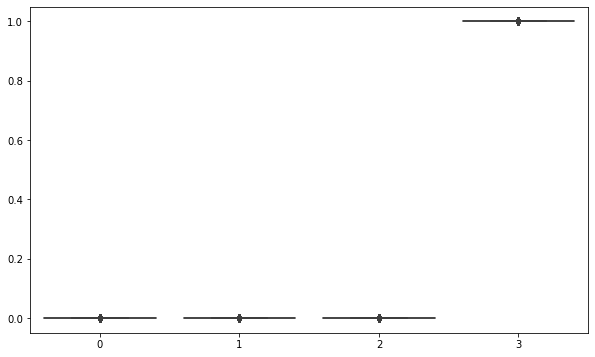

In [37]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=X_norm)

In [39]:
df_norm = pd.DataFrame(X_norm)
#df_norm['medv'] = y
df_norm.head()

,0,1,2,3
0,0.000013,0.000010,0.000030,1.0
1,0.000014,0.000020,0.000039,1.0
2,0.000010,0.000006,0.000024,1.0
3,0.000010,0.000004,0.000027,1.0
4,0.000009,0.000007,0.000025,1.0


In [41]:
x_norm = df_norm.drop(3, axis=1)
y_norm = df_norm[3]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x_norm , y_norm, test_size = 0.3)

#### Linear Regression

In [43]:
model_norm = LinearRegression()
model_norm.fit(X_train, y_train)

LinearRegression()

In [46]:
pred_norm = model_norm.predict(X_test)

In [45]:
MSE_norm = mean_squared_error(y_test, pred_norm)
MSE_norm

5.468217814537957e-18

#### Stochastic Gradient Descent

In [47]:
model_norm_2 = SGDRegressor()
model_norm_2.fit(X_train, y_train)

SGDRegressor()

In [48]:
pred_norm_2 = model_norm_2.predict(X_test)

In [49]:
MSE_norm_2 = mean_squared_error(y_test, pred_norm_2)
MSE_norm_2

6.639770827900729e-06